In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# get column names
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for i in columns:
    print(i['name'],i['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(func.max(Measurement.date)).first()

('2017-08-23',)

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
previous = dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the date and precipitation scores
query_1 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=previous).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_1 = pd.DataFrame(query_1,columns=['Date', 'Precipitation'])
df_1.sort_values(by='Date', ascending = True, inplace=True)
df_1.set_index('Date', inplace=True)
# Sort the dataframe by date
df_1


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


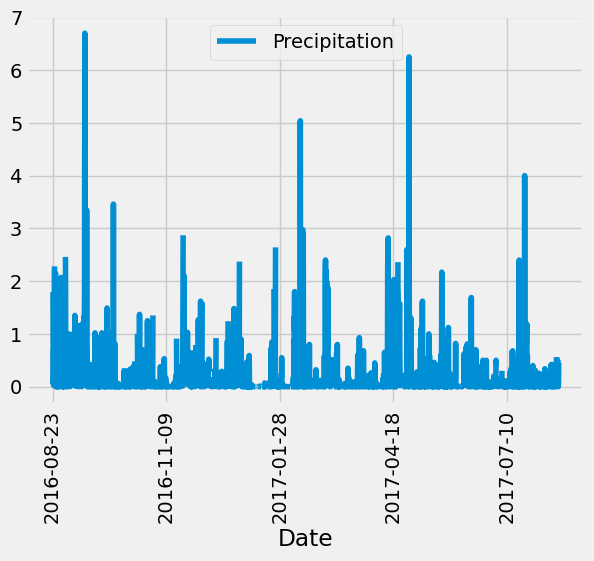

In [32]:

# Use Pandas Plotting with Matplotlib to plot the data
df_1.plot()
plt.xticks(rotation= 'vertical')
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_1.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number of stations in the dataset
tot_stations = session.query(Station.id).count()
tot_stations

9

In [21]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

active_station_max = active_stations[0][0]
session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
    filter(Measurement.station == active_station_max).all()

[(54.0, 71.66378066378067, 85.0)]

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram bins=12
tobs_results = session.query(Measurement.station, Measurement.tobs).\
        filter(Measurement.station == active_station_max).\
        filter(Measurement.date >= previous).all()
tobs_df = pd.DataFrame(tobs_results)
tobs_df.set_index('station', inplace= True)
tobs_df


,tobs
station,
USC00519281,77.0
USC00519281,77.0
USC00519281,80.0
USC00519281,80.0
USC00519281,75.0
...,...
USC00519281,77.0
USC00519281,77.0
USC00519281,76.0


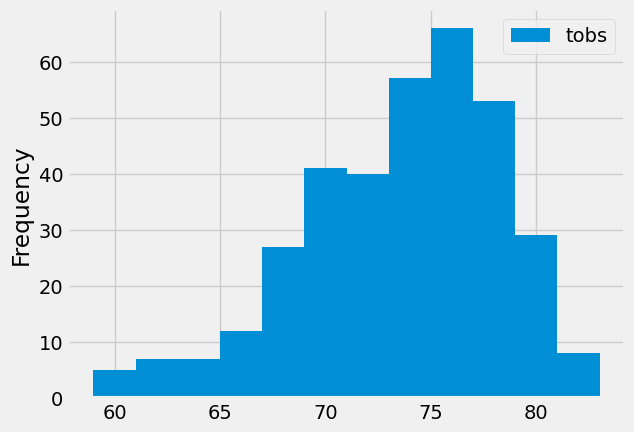

In [40]:
tobs_df.plot.hist(bins= 12)
plt.show()

# Close Session

In [17]:
# Close Session
session.close()